In [1]:
from __future__ import print_function, division
import geopandas as gp
import pandas as pd
import os
import json
import pylab as pl
from pandas.tools.plotting import scatter_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf
import datetime as dt

## enabling charts 

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
PLUTO = pd.read_csv('https://s3.amazonaws.com/modashare/PLUTO_processed.csv')

PLUTO.head()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (19,20,22,23,24,25,26,64,65,77,80) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,...,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,Version,BUILDING_CATCODE,BUILDING_CLASS
0,0,BK,1,1,302,21.0,NaN,13.0,33.0,11201.0,...,NaN,302 007,30101.0,NaN,3.000010e+09,11/26/2013,1,16V2,V,VACANT LAND
1,1,BK,1,50,302,21.0,2000.0,13.0,33.0,11201.0,...,NaN,302 007,30101.0,E-231,0.000000e+00,NaN,1,16V2,E,WAREHOUSES
2,2,BK,1,7501,302,21.0,2000.0,13.0,33.0,11201.0,...,NaN,302 007,30101.0,NaN,3.000010e+09,3/4/2016,1,16V2,R,CONDOMINIUMS
3,3,BK,3,1,302,21.0,3002.0,13.0,33.0,11201.0,...,NaN,302 007,30101.0,NaN,0.000000e+00,NaN,1,16V2,U,UTILITY BUREAU PROPERTIES
4,4,BK,3,5,302,21.0,NaN,13.0,33.0,11201.0,...,NaN,302 007,30101.0,NaN,0.000000e+00,NaN,4,16V2,T,TRANSPORTATION FACILITIES


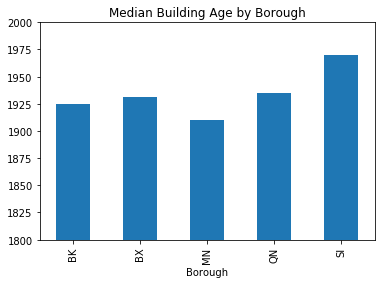

In [3]:
age = PLUTO.groupby('Borough')['YearBuilt'].median().plot(kind = 'bar', title = 'Median Building Age by Borough')
age = age.set_ylim(1800,2000)

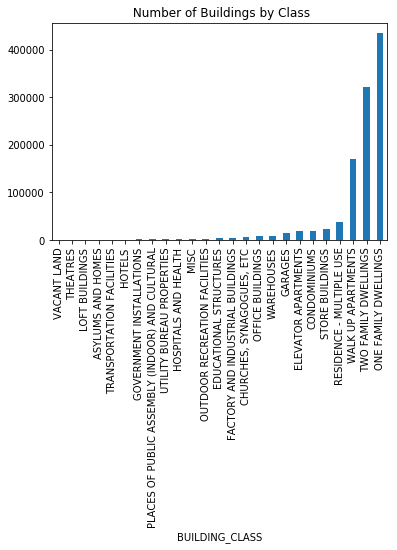

In [5]:
PLUTO.groupby('BUILDING_CLASS')['NumBldgs'].sum()\
            .sort_values()\
            .plot(kind = 'bar', title = ' Number of Buildings by Class')

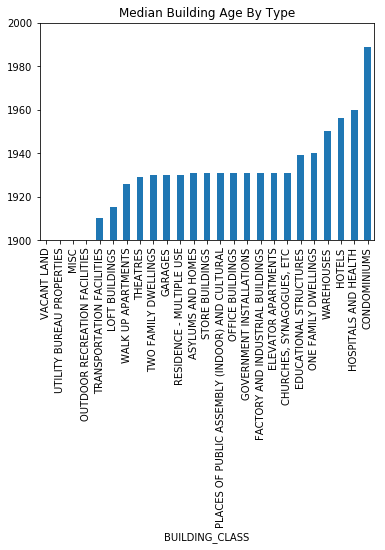

In [6]:
age = PLUTO.groupby('BUILDING_CLASS')['YearBuilt'].median()\
                        .sort_values()\
                        .plot(kind = 'bar', title = 'Median Building Age By Type')

age = age.set_ylim(1900,2000)

In [7]:
## 'C' is a code for city-owned property
City_Owned = PLUTO[PLUTO.OwnerType == 'C'] 

## This finds the tallest city-owned building (by number of floors) in each Zip Code
Tallest_Facilities = City_Owned.ix[City_Owned.groupby('ZipCode').NumFloors.idxmax()]


Tallest_Facilities[['ZipCode', 'Address', 'OwnerName','NumFloors']]

,ZipCode,Address,OwnerName,NumFloors
379255,10001.0,340 8 AVENUE,DCAS/DEPARTMENT OF ED,10.00
369057,10002.0,227 MADISON STREET,HEALTH AND HOSPITALS,14.00
381347,10003.0,38 IRVING PLACE,DCAS/DEPARTMENT OF ED,9.00
367144,10004.0,44 BEAVER STREET,SANITATION,12.00
368997,10005.0,42 SOUTH STREET,NYC PARKS,2.00
367076,10006.0,25 WEST STREET,MTA BRIDGES & TUNNELS,8.00
367583,10007.0,1 CENTRE STREET,NYC DCAS,39.00
370244,10009.0,282 EAST 3 STREET,NYC DHS,6.00
383220,10010.0,25-00 F D R DRIVE,WATERSIDE PLAZA LP,40.00
379200,10011.0,233 WEST 24 STREET,DCAS/DEPARTMENT OF ED,11.00


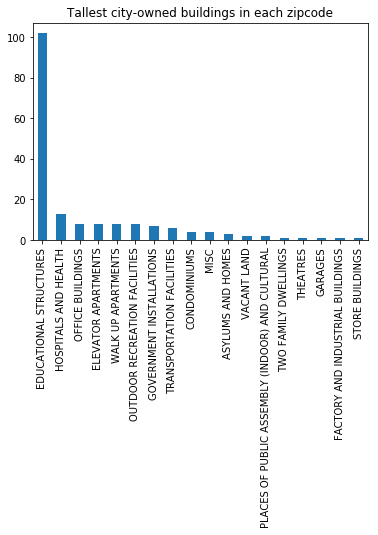

In [8]:
Tallest_Facilities.BUILDING_CLASS.value_counts().plot(kind = 'bar', title = 'Tallest city-owned buildings in each zipcode')